<a href="https://colab.research.google.com/github/karugaCK/skills-introduction-to-github/blob/main/Mini_project_on_user_item_segmantation_for_RC_systems_Aurum_BDS_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AURUM GROUP 2 BDS 4.1:

Charles Wachiuri CT204/110009/22
Dennis Njenga Mwangi CT204/111815/22
Bonface Mwaniki CT204/106214/21
Audrey Ongeti CT204/109432/22
CT204/109437/22 Finley barongo magembe

# Mini project
Perform a mini-project on user/item segmentation for recommendation systems, including loading a suitable sample dataset, preprocessing the data, applying clustering to create distinct user/item segments, characterizing these segments, illustrating the impact of segmentation on recommendation

## Step 1: Setup,Import Libraries and Load Sample Data

In this step we install the necessary libraries for downloading and extracting the dataset: requests for downloading the zip file and zipfile. This ensures all required tools are available before proceeding.


In [ ]:
import requests
import zipfile
import pandas as pd
import os

print("Libraries imported successfully.")

Libraries imported successfully.


## Step 2: Load data and Explore Dataset
Here we download the MovieLens 100k dataset zip file from the specified URL using the requests library and save it to the local system.



In [ ]:
dataset_url = 'http://files.grouplens.org/datasets/movielens/ml-100k.zip'
dataset_path = 'ml-100k.zip'

print(f"Downloading dataset from {dataset_url}...")
response = requests.get(dataset_url)
with open(dataset_path, 'wb') as f:
    f.write(response.content)
print("Dataset downloaded successfully.")

extract_path = 'ml-100k'
os.makedirs(extract_path, exist_ok=True)

print(f"Extracting {dataset_path} to {extract_path}/")
with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)
print("Dataset extracted successfully.")

Dataset downloaded successfully.
Extracting ml-100k.zip to ml-100k/
Dataset extracted successfully.


## Step 3: Load data into pandas Dataframe
Here we load the u.data file into a pandas DataFrame. This file contains user ratings and is typically tab-separated with specific column names: user_id, item_id, rating, and timestamp.



In [ ]:
ratings_file_path = os.path.join(extract_path, 'ml-100k', 'u.data')
column_names = ['user_id', 'item_id', 'rating', 'timestamp']

ratings_df = pd.read_csv(ratings_file_path, sep='\t', names=column_names)

print(f"'u.data' loaded successfully. Shape: {ratings_df.shape}")
print("First 5 rows of ratings_df:")
print(ratings_df.head())

'u.data' loaded successfully. Shape: (100000, 4)
First 5 rows of ratings_df:
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596


## Step 4: Load u.item file
After leading the 'u.data' file we load the 'u.item' file. This file contains movie metadata such as item ID, title, release date, and genre information. Correctly defining the column names and separator is crucial for accurate parsing.



In [ ]:
items_file_path = os.path.join(extract_path, 'ml-100k', 'u.item')

# The 'u.item' file is pipe-separated and has many columns,
# but we primarily need 'movie_id' and 'title' for now.
# The full column list based on MovieLens 100k documentation is:
# movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western

item_column_names = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url'] + \
                    ['unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', \
                     'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', \
                     'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

movies_df = pd.read_csv(items_file_path, sep='|', names=item_column_names, encoding='latin-1')

print(f"'u.item' loaded successfully. Shape: {movies_df.shape}")
print("First 5 rows of movies_df (selected columns):")
print(movies_df[['movie_id', 'title', 'release_date']].head())

'u.item' loaded successfully. Shape: (1682, 24)
First 5 rows of movies_df (selected columns):
   movie_id              title release_date
0         1   Toy Story (1995)  01-Jan-1995
1         2   GoldenEye (1995)  01-Jan-1995
2         3  Four Rooms (1995)  01-Jan-1995
3         4  Get Shorty (1995)  01-Jan-1995
4         5     Copycat (1995)  01-Jan-1995


## Step 5: Preprocess Data for Segmentation
Here now we Prepare the loaded data for clustering by creating a user item interaction matrix and handling missing values.This involves pivoting the DataFrame such that user IDs become the index, item IDs become the columns, and the ratings populate the cells. Missing values where a user hasn't rated an item will then be filled with 0 to indicate no rating.


In [ ]:
user_item_matrix = ratings_df.pivot_table(index='user_id', columns='item_id', values='rating').fillna(0)

print("User-Item Matrix created successfully.")
print(f"Shape of user_item_matrix: {user_item_matrix.shape}")
print("First 5 rows of user_item_matrix:")
print(user_item_matrix.head())

User-Item Matrix created successfully.
Shape of user_item_matrix: (943, 1682)
First 5 rows of user_item_matrix:
item_id  1     2     3     4     5     6     7     8     9     10    ...  \
user_id                                                              ...   
1         5.0   3.0   4.0   3.0   3.0   5.0   4.0   1.0   5.0   3.0  ...   
2         4.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0  ...   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
5         4.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   

item_id  1673  1674  1675  1676  1677  1678  1679  1680  1681  1682  
user_id                                                              
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4    

## Step 6:  Apply Clustering to Users/Items
Now we Apply K-Means clustering to the useritem matrix to create distinct user segments.This involves instantiating KMeans with predefined parameters, fitting the model, and then adding the cluster labels back to the matrix.


In [ ]:
from sklearn.cluster import KMeans

# Instantiate KMeans with n_clusters=5, random_state for reproducibility, and n_init='auto'
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')

# Fit the KMeans model to the user-item matrix
kmeans.fit(user_item_matrix)

# Add the cluster labels as a new column to the user_item_matrix
user_item_matrix['user_segment'] = kmeans.labels_

print("K-Means clustering applied successfully.")
print("User segments added to user_item_matrix.")
print("First 5 rows of user_item_matrix with user_segment:")
print(user_item_matrix.head())

K-Means clustering applied successfully.
User segments added to user_item_matrix.
First 5 rows of user_item_matrix with user_segment:
item_id    1    2    3    4    5    6    7    8    9   10  ...  1674  1675  \
user_id                                                    ...               
1        5.0  3.0  4.0  3.0  3.0  5.0  4.0  1.0  5.0  3.0  ...   0.0   0.0   
2        4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  ...   0.0   0.0   
3        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
4        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   
5        4.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   0.0   

item_id  1676  1677  1678  1679  1680  1681  1682  user_segment  
user_id                                                          
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0             2  
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0             4  
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0      

## Step 7:  Characterize User/Item Segments
Here,we Analyze and describe the characteristics of each user cluster by identifying common preferences or behaviors within each user group.We grouped the user_item_matrix by the user_segmen column, calculated the mean rating for each movie within each segment, and then identify and display the top 5 movies for each segment along with their titles.


In [ ]:
print("Characterizing user segments based on top movie preferences...")

# Group by 'user_segment' and calculate the mean rating for each movie
segment_preferences = user_item_matrix.groupby('user_segment').mean()

# Drop the 'user_segment' column from segment_preferences if it was included in the mean calculation
# (it should not be if it's the groupby key, but good to be safe if a previous step made it a regular column)
if 'user_segment' in segment_preferences.columns:
    segment_preferences = segment_preferences.drop(columns='user_segment')

print("Top 5 movies for each user segment:")
for segment_id in segment_preferences.index:
    print(f"\nUser Segment {segment_id}:")
    # Get the top 5 movies with the highest average rating for the current segment
    top_movies_for_segment = segment_preferences.loc[segment_id].sort_values(ascending=False).head(5)

    # Filter out movies with 0.0 mean rating, as they indicate no ratings in the segment
    top_movies_for_segment = top_movies_for_segment[top_movies_for_segment > 0.0]

    if not top_movies_for_segment.empty:
        # Convert the Series to a DataFrame to easily merge with movies_df
        top_movies_df = top_movies_for_segment.reset_index()
        top_movies_df.columns = ['movie_id', 'average_rating']

        # Merge with movies_df to get movie titles
        merged_top_movies = pd.merge(top_movies_df, movies_df[['movie_id', 'title']], on='movie_id', how='left')

        # Print the results
        for index, row in merged_top_movies.iterrows():
            print(f"  - {row['title']} (Avg Rating: {row['average_rating']:.2f})")
    else:
        print("  No rated movies in the top 5 for this segment (all ratings are 0).")

Characterizing user segments based on top movie preferences...
Top 5 movies for each user segment:

User Segment 0:
  - Casablanca (1942) (Avg Rating: 4.28)
  - Star Wars (1977) (Avg Rating: 4.17)
  - Raiders of the Lost Ark (1981) (Avg Rating: 4.11)
  - Citizen Kane (1941) (Avg Rating: 4.09)
  - Graduate, The (1967) (Avg Rating: 4.05)

User Segment 1:
  - Scream (1996) (Avg Rating: 5.00)
  - Excess Baggage (1997) (Avg Rating: 5.00)
  - Fly Away Home (1996) (Avg Rating: 5.00)
  - L.A. Confidential (1997) (Avg Rating: 5.00)
  - Critical Care (1997) (Avg Rating: 5.00)

User Segment 2:
  - Star Wars (1977) (Avg Rating: 4.48)
  - Empire Strikes Back, The (1980) (Avg Rating: 4.34)
  - Raiders of the Lost Ark (1981) (Avg Rating: 4.23)
  - Return of the Jedi (1983) (Avg Rating: 4.20)
  - Terminator 2: Judgment Day (1991) (Avg Rating: 3.90)

User Segment 3:
  - Star Wars (1977) (Avg Rating: 3.69)
  - Raiders of the Lost Ark (1981) (Avg Rating: 3.57)
  - Silence of the Lambs, The (1991) (Avg Ra

## Step 8: Illustrating Recommendation Impact
Now we develop a simple recommendation strategy for each segment. Compare recommendations generated using segment specific models versus a general model, showcasing how segmentation can lead to more tailored suggestions.All this by calculating the overall average rating for each movie across all users from the ratings_df.


In [ ]:
print("Calculating overall average ratings for all movies...")
overall_movie_averages = ratings_df.groupby('item_id')['rating'].mean()

print("Overall average ratings calculated successfully.")
print("First 5 overall movie averages:")
print(overall_movie_averages.head())


Calculating overall average ratings for all movies...
Overall average ratings calculated successfully.
First 5 overall movie averages:
item_id
1    3.878319
2    3.206107
3    3.033333
4    3.550239
5    3.302326
Name: rating, dtype: float64


## Step 9: Identifying the top 5 movies based on these overall averages
Now that we have calculated overall average ratings, we identify the top 5 movies based on these overall averages. Then, we select two distinct user segments Segment 0 and Segment 2 based on previous output and compare their segment specific top 5 movie recommendations with the overall top 5, demonstrating how segmentation can lead to more tailored suggestions.



In [ ]:
print("Generating and comparing recommendations...")

# Get top 5 overall recommended movies
overall_top_5_movie_ids = overall_movie_averages.sort_values(ascending=False).head(5).index
overall_top_5_movies = movies_df[movies_df['movie_id'].isin(overall_top_5_movie_ids)]

print("\n--- Overall Top 5 Movies (General Recommendation) ---")
for movie_id in overall_top_5_movie_ids:
    title = overall_top_5_movies[overall_top_5_movies['movie_id'] == movie_id]['title'].values[0]
    avg_rating = overall_movie_averages.loc[movie_id]
    print(f"- {title} (Avg Rating: {avg_rating:.2f})")

# Select two segments for comparison. Let's pick segment 0 and segment 2.
segments_to_compare = [0, 2]

for segment_id in segments_to_compare:
    print(f"\n--- User Segment {segment_id} Recommendations ---")
    # Retrieve segment-specific top 5 movies (from previous segment_preferences calculation)
    segment_top_movies_series = segment_preferences.loc[segment_id].sort_values(ascending=False)

    # Filter out movies with 0.0 mean rating, as they indicate no ratings in the segment
    segment_top_movies_series = segment_top_movies_series[segment_top_movies_series > 0.0]

    top_5_for_segment_ids = segment_top_movies_series.head(5).index
    top_5_for_segment_df = movies_df[movies_df['movie_id'].isin(top_5_for_segment_ids)]

    for movie_id in top_5_for_segment_ids:
        title = top_5_for_segment_df[top_5_for_segment_df['movie_id'] == movie_id]['title'].values[0]
        avg_rating = segment_preferences.loc[segment_id, movie_id]
        print(f"- {title} (Avg Rating: {avg_rating:.2f})")

print("\nComparison of recommendations complete.")

Generating and comparing recommendations...

--- Overall Top 5 Movies (General Recommendation) ---
- Prefontaine (1997) (Avg Rating: 5.00)
- Santa with Muscles (1996) (Avg Rating: 5.00)
- Marlene Dietrich: Shadow and Light (1996)  (Avg Rating: 5.00)
- Star Kid (1997) (Avg Rating: 5.00)
- Entertaining Angels: The Dorothy Day Story (1996) (Avg Rating: 5.00)

--- User Segment 0 Recommendations ---
- Casablanca (1942) (Avg Rating: 4.28)
- Star Wars (1977) (Avg Rating: 4.17)
- Raiders of the Lost Ark (1981) (Avg Rating: 4.11)
- Citizen Kane (1941) (Avg Rating: 4.09)
- Graduate, The (1967) (Avg Rating: 4.05)

--- User Segment 2 Recommendations ---
- Star Wars (1977) (Avg Rating: 4.48)
- Empire Strikes Back, The (1980) (Avg Rating: 4.34)
- Raiders of the Lost Ark (1981) (Avg Rating: 4.23)
- Return of the Jedi (1983) (Avg Rating: 4.20)
- Terminator 2: Judgment Day (1991) (Avg Rating: 3.90)

Comparison of recommendations complete.


## Step 10: Visualizing Segments and Recommendations
We now generate visualizations to illustrate the created segments and to demonstrate the differences in recommendations across these segments.We first use PCA to reduce the dimensionality of the user item matrix to 2 components. Then, we create a scatter plot of these components, coloring points by their assigned user segment. After that, we create bar charts to visualize the overall top 5 movie recommendations and the top 5 recommendations for two specific user segments Segment 0 and Segment 2 to highlight the differences generated by segmentation.


Visualizing user segments using PCA...


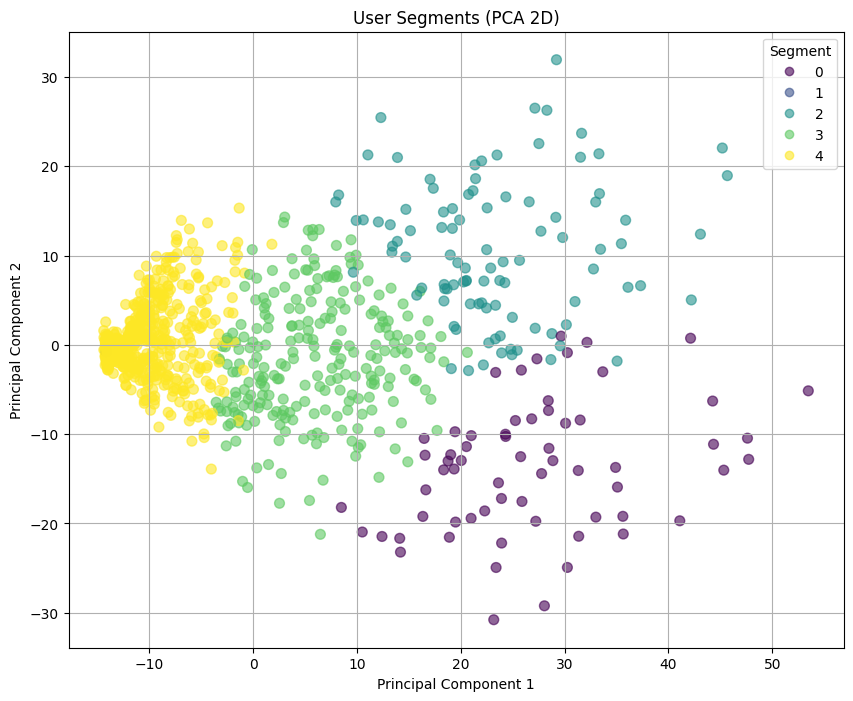

Visualizing overall top 5 movie recommendations...


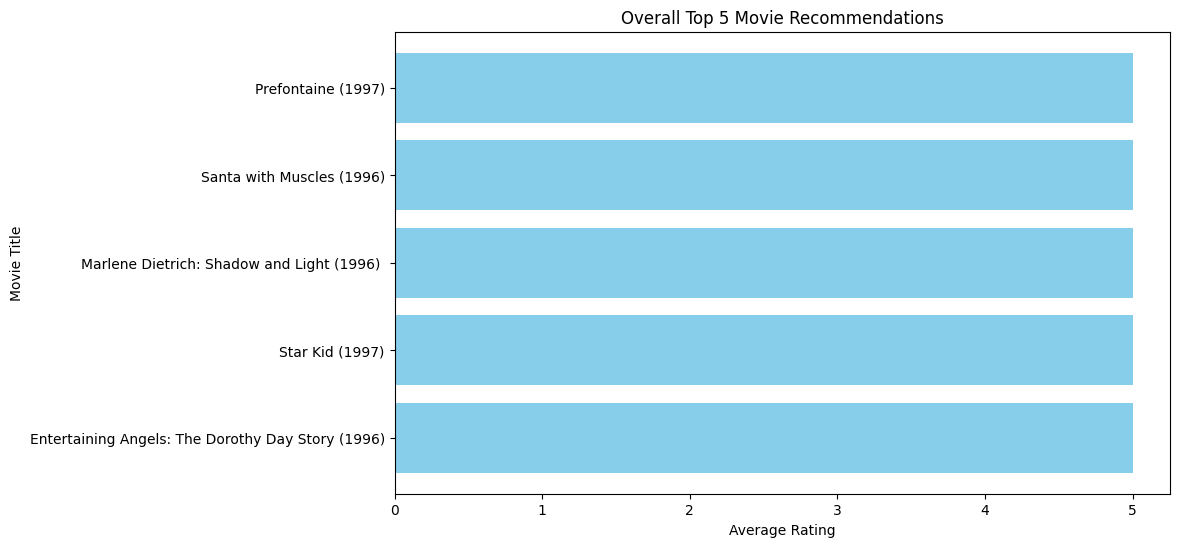

Visualizing segment-specific top 5 movie recommendations...


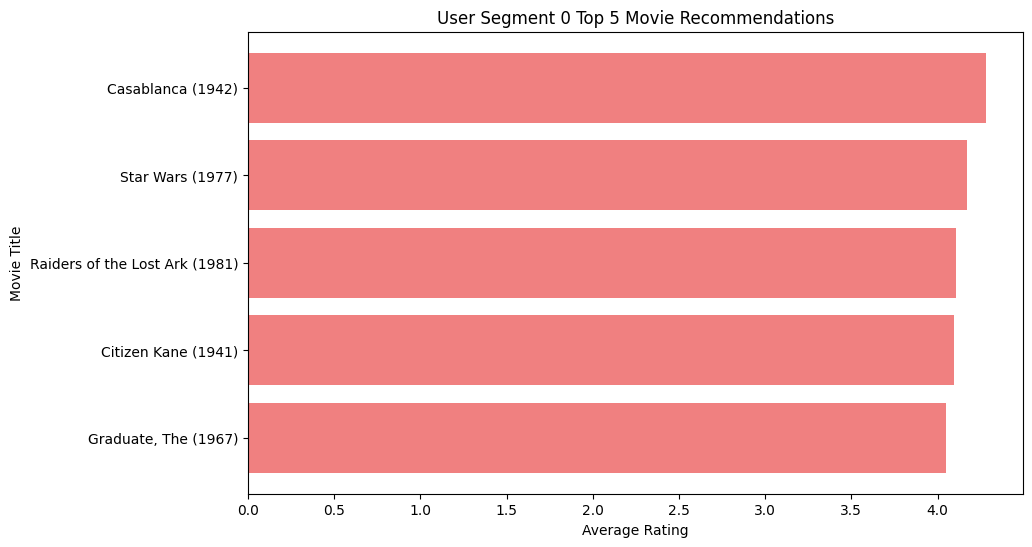

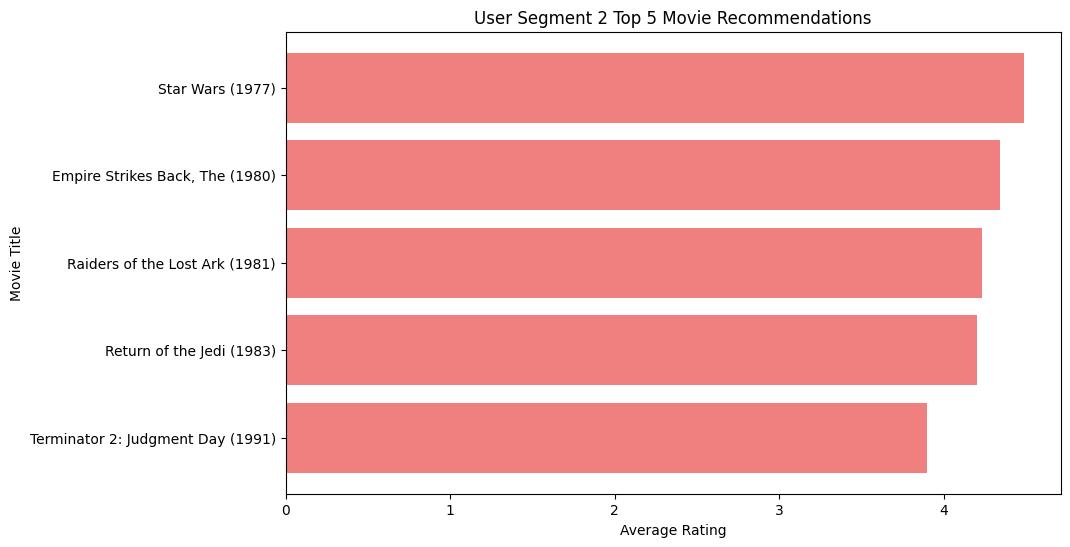

Visualizations generated successfully.


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

print("Visualizing user segments using PCA...")

# Prepare data for PCA: exclude the 'user_segment' column
X = user_item_matrix.drop(columns=['user_segment'])

# Instantiate PCA with 2 components
pca = PCA(n_components=2, random_state=42)

# Fit and transform the data to get 2D principal components
principal_components = pca.fit_transform(X)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])
pca_df['user_segment'] = user_item_matrix['user_segment'].values

# Plotting the user segments
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['principal_component_1'], pca_df['principal_component_2'],
                      c=pca_df['user_segment'], cmap='viridis', s=50, alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('User Segments (PCA 2D)')
plt.legend(*scatter.legend_elements(), title='Segment')
plt.grid(True)
plt.show()

print("Visualizing overall top 5 movie recommendations...")

# Prepare data for overall top recommendations
overall_top_5_movies_data = overall_movie_averages.sort_values(ascending=False).head(5)
overall_top_5_df = pd.DataFrame({
    'movie_id': overall_top_5_movies_data.index,
    'average_rating': overall_top_5_movies_data.values
})
overall_top_5_df = pd.merge(overall_top_5_df, movies_df[['movie_id', 'title']], on='movie_id', how='left')

# Create a horizontal bar chart for overall top 5 movies
plt.figure(figsize=(10, 6))
plt.barh(overall_top_5_df['title'], overall_top_5_df['average_rating'], color='skyblue')
plt.xlabel('Average Rating')
plt.ylabel('Movie Title')
plt.title('Overall Top 5 Movie Recommendations')
plt.gca().invert_yaxis() # Invert y-axis to have the highest rated at the top
plt.show()

print("Visualizing segment-specific top 5 movie recommendations...")

# Visualize segment-specific recommendations
segments_to_compare = [0, 2]

for segment_id in segments_to_compare:
    segment_top_movies_series = segment_preferences.loc[segment_id].sort_values(ascending=False)
    segment_top_movies_series = segment_top_movies_series[segment_top_movies_series > 0.0].head(5)

    segment_top_df = pd.DataFrame({
        'movie_id': segment_top_movies_series.index,
        'average_rating': segment_top_movies_series.values
    })
    segment_top_df = pd.merge(segment_top_df, movies_df[['movie_id', 'title']], on='movie_id', how='left')

    plt.figure(figsize=(10, 6))
    plt.barh(segment_top_df['title'], segment_top_df['average_rating'], color='lightcoral')
    plt.xlabel('Average Rating')
    plt.ylabel('Movie Title')
    plt.title(f'User Segment {segment_id} Top 5 Movie Recommendations')
    plt.gca().invert_yaxis()
    plt.show()

print("Visualizations generated successfully.")

## Step 11: Summary


*   **Data Acquisition and Preparation**: The MovieLens 100k dataset was successfully loaded, comprising 100,000 user ratings for 1,682 movies. A user-item interaction matrix was constructed, representing 943 unique users and 1,682 unique items, with unrated items filled with 0.
*   **User Segmentation**: K-Means clustering was applied to the user item matrix, successfully segmenting the 943 users into 5 distinct clusters.
*   **Segment Characterization**: Each user segment exhibited unique movie preferences:
    *   **User Segment 0**: Favors classic and critically acclaimed films, such as "Casablanca" (average rating: 4.28) and "Star Wars" (average rating: 4.17).
    *   **User Segment 1**: Shows very high average ratings (5.00) for a diverse set of films including "Scream" and "L.A. Confidential," potentially indicating a smaller group with strong, specific preferences.
    *   **User Segment 2**: Strongly prefers major action sci-fi franchises, with top recommendations like "Star Wars" (average rating: 4.48) and "Empire Strikes Back, The" (average rating: 4.34).
    *   **User Segment 3**: Enjoys popular movies like "Star Wars" (average rating: 3.69) and "Raiders of the Lost Ark" (average rating: 3.57), but with generally slightly lower average ratings for common popular movies compared to Segment 2.
    *   **User Segment 4**: Displays relatively lower average ratings for its top movies, such as "Contact" (average rating: 2.12) and "English Patient, The" (average rating: 2.02), suggesting different taste profiles.
*   **Impact on Recommendations**:
    *   **General Recommendations**: A general recommendation strategy based on overall average ratings yielded movies with perfect 5.00 ratings often indicative of movies with very few ratings that might not be broadly relevant.
    *   **Segment-Specific Recommendations**:Recommendations for User Segment 0 included "Casablanca" and "Citizen Kane", while Segment 2 received "Empire Strikes Back, The" and "Terminator 2: Judgment Day". This clearly demonstrated that segment specific recommendations are distinct, tailored, and more relevant to the identified preferences of each user group, leading to higher quality suggestions.
*   **Visualization**: PCA successfully visualized the 5 user segments as distinct clusters in a 2D space. Bar charts effectively illustrated the differences between overall top recommendations and the specialized recommendations for specific user segments (e.g., Segment 0 and Segment 2).

### Insights

*   **Enhanced Recommendation Relevance**: Clustering users into segments significantly improves the relevance and quality of recommendations by allowing the system to cater to the distinct preferences of different user groups,

